# Construction du cycle de Carnot

Le cycle de Carnot est composé de deux transformations isothermes et deux transformations adiabatiques. Les performances, c'est à dire le rendement dans le cas d'une machine motrice et leS COP dans le cas d'une machine frigo ou d'une PAC sont indépendantes de la nature de la substance. Pour simplifier nous considérerons donc un gaz parfait diatomique (afin d'être plus proche de l'air).

Le cycle que le gaz subit est représenté schématiquement sur la figure suivante. 

![image](./Carnot-1.png)

Dans le cas d'un moteur les points morts bas et haut permettent de définir les extrémités du cycle, ce sont des paramètres.
Par exemple nous allons considérer un cycle avec les paramètres suivant:

|Point | Volume &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     | Température  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        | pression  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         | nombre de mole &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
| :----------------------------:  |  :-----------------------:   |  :----------------------:        |  :---------------------:      |  :-----------------------:          |
| 1    | $V_1 = 10^{-3}\;m^3$ | $T_1=300\; K$ | $p_1= 10^5\; Pa$ | $n = \frac{p_1V_1}{RT_1}$|
| 2    | $V_2 = 10^{-4}\;m^3$ | $T_2=600\; K$ | $p_2= \frac{V_1 T_2}{V_2T_1}$ | $n = \frac{p_1V_1}{RT_1}$|

## Branche compression $1\rightarrow  A \rightarrow 2$

### coordonnées du point A

dans cette branche le gaz va recevoir du travail du système extérieur et va céder de la chaleur sur la transformation isotherme sur la branche $1\rightarrow A$

Les lignes en pointillés représentent les transformations isothermes dont l'équation est $pV=nRT$ ce qui impose:
\begin{align}
p_AV_A = p_1V_1 = nRT_f
\end{align}
ou on a posé $T_1 = T_f$ la température la plus froide de la transformation.

Les lignes en point-trait représenten les transformations adiabatiques don l'équation est $pV^\gamma = cst$ ce qui impose:
\begin{align}
p_A V_A^\gamma &= p_2V_2^\gamma \\
T_f V_A^{\gamma -1} &= T_cV_2^{\gamma-1}
\end{align}
ou on a utilisé l'équation d'état des gaz parfait $p =\frac{nRT}{V}$ et on a posé $T_2 = T_c$ la température la plus chaude de la transformation.
on trouve ainsi l'expression du volume au point A en fonction du volume au point 2 et du rapport des températures:
\begin{align}
V_A = V_2 \left(\frac{T_c}{T_f} \right)^{\frac{1}{\gamma-1}}
\end{align}

### travail échangé
#### branche isotherme $1\rightarrow A$
sur la branche isotherme le travail se calcul en intégrant la forme différentielle:
\begin{align}
\delta W &= -pdV = -nRT_f \frac{dV}{V}\\
W_{1\rightarrow A} &= -nRT_f\int_{V_1}^{V_A} \frac{dV}{V} = -nRT_f\ln\left(\frac{V_A}{V_1}\right) \\
W_{1\rightarrow A} &= -nRT_f \ln\left(\frac{V_2}{V_1} \left(\frac{T_c}{T_f} \right)^{\frac{1}{\gamma-1}}\right)
\end{align}
Remarque: le travail ici doit être positif car le système gaz parfait reçoit de l'énergie de la part de l'opérateur extérieur qui le comprime.
#### branche adiabatique $A\rightarrow 2$
Sur cette branche aucune chaleur n'est échangée donc toute la variation d'énergie interne est dûe à l'échange de travail:
\begin{align}
W_{A\rightarrow 2} = U_2- U_A = nc_V (T_c-T_f) = \frac{nRT_f}{\gamma-1}\left(\frac{T_c}{T_f}-1\right)=\frac{p_1V_1}{\gamma-1}\left(\frac{T_c}{T_f}-1\right)
\end{align}

Le travail total échangé sur la branche de compression est donc la somme de ces deux contributions:
\begin{align}
W_{1\rightarrow 2} =  -nRT_f \ln\left(\frac{V_2}{V_1} \left(\frac{T_c}{T_f} \right)^{\frac{1}{\gamma-1}}\right) +\frac{nRT_f}{\gamma-1}\left(\frac{T_c}{T_f}-1\right)
\end{align}

### chaleur échangée

le gaz n'échange de la chaleur que sur la branche isotherme et la chaleur échangée correspond à l'opposé du travail car l'énergie interne est constante puisqu'elle ne dépend que de la température.
\begin{align}
Q_{1\rightarrow A} = nRT_f \ln\left(\frac{V_2}{V_1} \left(\frac{T_c}{T_f} \right)^{\frac{1}{\gamma-1}}\right)
\end{align}

In [59]:
# calculs numériques
import numpy as np ## librairie de calcul vectoriel similaire à Matlab
import matplotlib.pyplot as plt

# paramètres du cyles, données

gamma = 7.0/5.0
R = 8.314
## ces valeurs peuvent être changées pour tester
V1 = 1e-3
V2 = 0.5e-4
T1 = 300.0
T2 = 400.0 
p1 = 1e5
##
n = p1*V1/(R*T1) 
print("le nombre de mole de gaz parfait qui constitue le système est n = %f mole"%(n))
p2 = n*R*T2/V2
print("la pression maximale du gaz dans le cycle est de p2 = %f Pa (%f) x p1"%(p2, p2/p1))

T2max = T1*(V1/V2)**(gamma-1)
print("la température maximale de ce cycle est Tmax = %f"%(T2max))
# volume au point A
VA = V2 * (T2/T1)**(1.0/(gamma-1.0))
print("le volume au point A est VA = %f L"%(VA))

le nombre de mole de gaz parfait qui constitue le système est n = 0.040093 mole
la pression maximale du gaz dans le cycle est de p2 = 2666666.666667 Pa (26.666667) x p1
la température maximale de ce cycle est Tmax = 994.336205
le volume au point A est VA = 0.000103 L


## Branche détente $2\rightarrow  B \rightarrow 1$

sur cette branche le gaz parfait se détent en recevant de la chaleur et en produisant un travail plus grand que le travail néecessaire à sa compression.

### coordonnées du point B

à partir du point 2 le gaz subit une détente isotherme d'équation $pV=nRT_2$
à partir du point B il subit une détente adiabatique qui le ramène au point 1 dont l'équation sera $pV^\gamma = p_1V_1^{\gamma}$. On a donc la relation suivante:
\begin{align}
V_B =  V_1 \left(\frac{T_f}{T_c}\right)^{\frac{1}{\gamma -1}}
\end{align}

### calcul du travail échangé

#### branche isotherme $2\rightarrow  B$

sur cette branche on intègre de la même facon et on trouve:
\begin{align}
W_{2\rightarrow B}= - nRT_c \ln\left(\frac{V_1}{V_2}\left(\frac{T_f}{T_c}\right)^{\frac{1}{\gamma -1}}\right) 
\end{align}

#### branche adiabatique $B\rightarrow  1$

Sur cette branche, le travail correspond à la variation d'énergie interne car il n'y a aucun échange de chaleur:
\begin{align}
W_{B\rightarrow 1} = U_1- U_B = nc_V (T_f-T_c) = -\frac{nRT_f}{\gamma-1}\left(\frac{T_c}{T_f}-1\right)=-W_{A\rightarrow 2}
\end{align}

le travail total sur cette branche s'exprime comme:
\begin{align}
W_{2\rightarrow  B \rightarrow 1} = - nRT_c \ln\left(\frac{V_1}{V_2}\left(\frac{T_f}{T_c}\right)^{\frac{1}{\gamma -1}}\right) -\frac{nRT_f}{\gamma-1}\left(\frac{T_c}{T_f}-1\right)
\end{align}

### calcul de la chaleur échangée

Le gaz n'échange de la chaleur que lors de la transformation isotherme, la chlauer échangée correspond à l'opposé du travail:
\begin{align}
Q_{2\rightarrow B \rightarrow 1}=  nRT_c \ln\left(\frac{V_1}{V_2}\left(\frac{T_f}{T_c}\right)^{\frac{1}{\gamma -1}}\right) 
\end{align}

In [60]:
VB = V1 *(T1/T2)**(1.0/(gamma-1.0))
print("le volume au point B est VB = %f L"%(VB))
W1A= -p1*V1 *np.log(V2/V1 * (T2/T1)**(1/(gamma-1)))
WA2=  p1*V1 /  (gamma-1.0) *(T2/T1-1.0)
W2B =  -p2*V2*np.log(V1/V2*(T1/T2)**(1/(gamma-1)))
WB1 = -p1*V1/(gamma-1.0)*(T2/T1-1)
print("le travail de compression 1->A est W1A = %f J"%(W1A))
print("le travail de compression A->2 est WA2 = %f J"%(WA2))
print("le travail de compression 2->B est W2B = %f J"%(W2B))
print("le travail de compression B->1 est WB1 = %f J"%(WB1))
print("le travail total est W = %f J"%(W1A+W2B))
print(" la chaleur échangée avec la source froide est Qf = %f J"%(-W1A))
print(" la chaleur échangée avec la source chaude est Qc = %f J"%(-W2B))
print(" le rendement du moteur est eta = %f"%(np.abs(W1A+W2B)/-W2B))

le volume au point B est VB = 0.000487 L
le travail de compression 1->A est W1A = 227.652709 J
le travail de compression A->2 est WA2 = 83.333333 J
le travail de compression 2->B est W2B = -303.536946 J
le travail de compression B->1 est WB1 = -83.333333 J
le travail total est W = -75.884236 J
 la chaleur échangée avec la source froide est Qf = -227.652709 J
 la chaleur échangée avec la source chaude est Qc = 303.536946 J
 le rendement du moteur est eta = 0.250000


Text(0,0.5,'pression ($\\times 10^5$ Pa)')

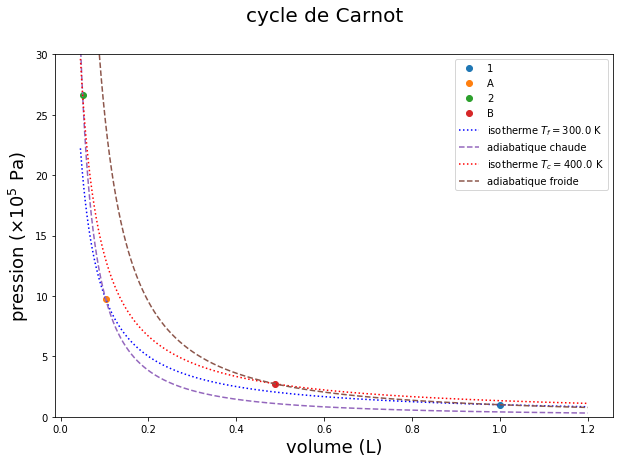

In [70]:
fig1, ax1 = plt.subplots(figsize=(10,10/1.5))
fig1.suptitle("cycle de Carnot", size = 20)
V = np.linspace (V2*0.9,1.2*V1,10000)
ax1.plot(V1*1000,p1/p1,'o', label = '1')
ax1.plot(VA*1000,n*R*T1/VA/p1,'o', label = 'A')

ax1.plot(V2*1000,p2/p1,'o', label = '2')
ax1.plot(VB*1000,n*R*T2/VB/p1,'o', label = 'B')

ax1.plot(V*1000, p1*V1/V/p1,'b:', label = "isotherme $T_f = %.1f$ K"%(T1))
ax1.plot(V*1000, p2*V2**gamma/V**gamma/p1, '--', label = "adiabatique chaude")
ax1.plot(V*1000, p2*V2/V/p1,'r:', label = "isotherme $T_c=%.1f$ K"%(T2))
ax1.plot(V*1000,p1*V1**gamma/V**gamma/p1,'--', label = 'adiabatique froide')
ax1.set_ylim(0,30) ### adapter aux valeurs
ax1.legend()
ax1.set_xlabel("volume (L)",size=18)
ax1.set_ylabel(r"pression ($\times 10^5$ Pa)", size=18)